In [2]:
import numpy as np

In [3]:
from matplotlib import pyplot as plt

In [4]:
data = np.loadtxt(fname="./vela_Pulsar.mbr")    #Importing data

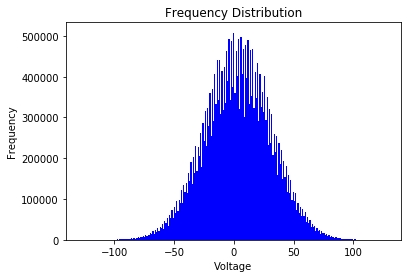

In [4]:
plt.hist(data[:,0],color='b',bins=int(256))   #Histogram for distribution of voltage values
plt.title('Frequency Distribution')
plt.xlabel('Voltage')
plt.ylabel('Frequency')
plt.savefig('fig1.png')

In [5]:
volt_mat=np.empty([512,60000])

In [6]:
volt_mat=np.reshape(data[:,0],(512,60000),order='F')     #Reshaping the original dataset into a matrix

In [7]:
volt_fft=np.empty((512,60000),complex)

In [8]:
for m in range(0,60000):
    volt_fft[:,m]=np.fft.fft(volt_mat[:,m])      #Column-wise FFT 

In [9]:
volt_psd=(np.absolute(volt_fft))**2                      # P.S.D.=|FFT|^2

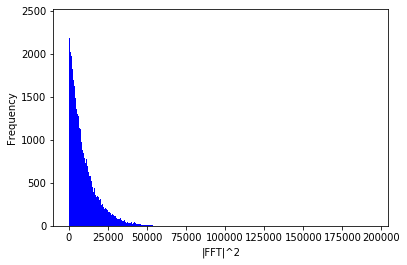

In [20]:
plt.hist(volt_psd[1,:],512,color='blue')    #Histogram for distribution of |FFT|^2
plt.xlabel('|FFT|^2')
plt.ylabel('Frequency')
plt.savefig('fig2.png')

In [11]:
volt_psd_avg=np.empty((512,1000))

In [12]:
for i in range(0,1000):
    volt_psd_avg[:,i]=np.sum(volt_psd[:,60*i:60*(i+1)-1],axis=1)
    
#Taking time average of every 60 columns

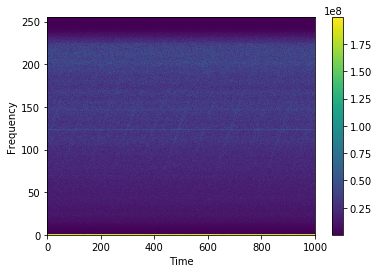

In [17]:
plt.pcolormesh(volt_psd_avg[0:255,:]);         #Spectrogram
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar()
plt.savefig('fig3.png')